In [1]:
#lexical richness 
#first we need to exclude the english text in the source and chinese in the target 
#use unicode to detect Chinese and English
def detect_language(char):
    if u'\u4e00' <= char <= u'\u9fff' or \
       u'\u3400' <= char <= u'\u4dbf':
        return 'chinese'
    elif u'\u0041' <= char <= u'\u005a' or \
         u'\u0061' <= char <= u'\u007a':
        return 'english'
    return 'other'

In [2]:
# make english only target text 
f=open('/users/nannanliu/Python/SCIPPC/2013_target_text.xml')
lines=f.read()
chinese_words =''.join([i for i in lines if detect_language(i) == 'chinese'])
newlines=lines.replace(chinese_words, '')
with open('/users/nannanliu/Python/SCIPPC/2013_english_text.xml', 'w') as file:
    file.writelines(newlines)

In [1]:
#create a corpus for all english text
import nltk
from nltk.corpus import PlaintextCorpusReader
corpus_root = '/users/nannanliu/Python/SCIPPC/English_texts'
corpus = PlaintextCorpusReader(corpus_root, '.*')
corpus.words()

['Good', 'morning', 'ladies', 'and', 'gentlemen', ',', ...]

In [3]:
#check if fileids are correct
files=corpus.fileids()
for f in files: 
    print (f)

2003_english_text.xml
2013_english_text.xml


In [4]:
text_2003=corpus.raw('2003_english_text.xml')
text_2013=corpus.raw('2013_english_text.xml')

In [5]:
#tokenize texts, tokenize means read as words
tokens=nltk.word_tokenize(text_2003)
text_2003=nltk.Text(tokens)
print (text_2003)

<Text: Good morning ladies and gentlemen , we are...>


In [6]:
tokens=nltk.word_tokenize(text_2013)
text_2013=nltk.Text(tokens)
print (text_2013)

<Text: Ladies and gentlemen , good morning . Today...>


In [7]:
#find out the number of tokens in the 2003 target text
print (len(text_2003))
#find out the number of tokens in the 2013 target text
print (len(text_2013))

6818
6787


In [9]:
#define a function for lexical diversity cause we'll use it a lot
def lexical_diversity (text):
    return len(set(text))/len(text)

In [10]:
lexical_diversity (text_2003)

0.2301261366969786

In [11]:
lexical_diversity (text_2013)

0.21585383822012671

In [12]:
#get a sorted list of vocabulary items
sorted (set(text_2003))
#get the number of word types, or distinct words
len(set(text_2003))
#get the type/token ratio 
len(set(text_2003))/len(text_2003)

0.2301261366969786

In [13]:
#get a sorted list of vocabulary items
sorted (set(text_2013))
#get the number of word types, or distinct words
len(set(text_2013))
#get the type/token ratio 

1465

In [14]:
#now let's find out the lexical density of the texts
#start with pos tagging
#nltk uses default Penn Treebank tagset https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html
text_2003_tagged=nltk.pos_tag(text_2003)
text_2013_tagged=nltk.pos_tag(text_2013)

In [15]:
#find out which tags are most common 
tag_fd_2003 = nltk.FreqDist(tag for (word, tag) in text_2003_tagged)
tag_fd_2003.keys()

dict_keys(['JJ', 'NN', 'NNS', 'CC', ',', 'PRP', 'VBP', 'RB', 'TO', 'VB', 'IN', 'VBN', 'JJR', 'NNP', 'PRP$', '.', 'DT', 'MD', 'VBG', 'PDT', 'CD', 'WP', 'VBD', 'RP', 'WDT', 'WRB', 'RBR', 'VBZ', 'JJS', 'EX', ':', 'RBS', 'NNPS', 'POS', 'UH'])

In [16]:
#find out which tags are most common 
tag_fd_2013 = nltk.FreqDist(tag for (word, tag) in text_2013_tagged)
tag_fd_2013.keys()

dict_keys(['NNS', 'CC', ',', 'JJ', 'NN', '.', 'PRP', 'VBP', 'TO', 'VB', 'DT', 'IN', 'NNP', 'RB', 'MD', 'PRP$', 'VBG', 'WP', 'VBD', 'VBN', 'JJR', 'VBZ', 'WRB', 'CD', 'WDT', 'RBR', 'PDT', 'EX', 'JJS', 'RP', ':', 'NNPS', 'RBS', 'FW', 'POS'])

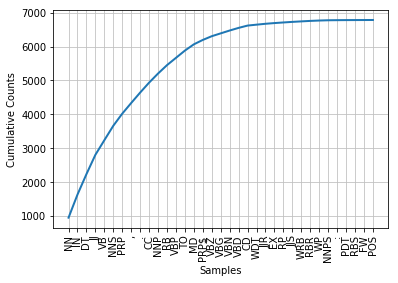

In [17]:
import matplotlib.pyplot as plot
%matplotlib inline
tag_fd_2013.plot(cumulative=True)

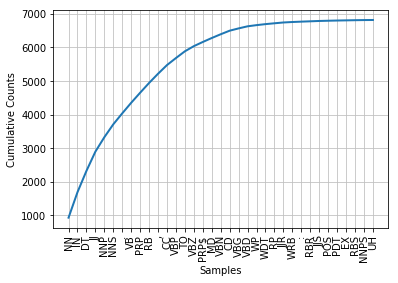

In [18]:
tag_fd_2003.plot(cumulative=True)

In [19]:

[word + "/" + tag for (word, tag) in tag_fd_2003 if tag.startswith('V')]

ValueError: too many values to unpack (expected 2)

In [20]:
#check the most frequent words in the corpus against Zipf's law
import nltk
from nltk import FreqDist
fdist_2003=FreqDist(text_2003)
fdist_2003.most_common(20)

[('the', 402),
 ('.', 302),
 (',', 274),
 ('of', 213),
 ('and', 212),
 ('to', 196),
 ('in', 99),
 ('a', 95),
 ('I', 88),
 ('is', 80),
 ('we', 59),
 ('will', 56),
 ('China', 53),
 ('have', 51),
 ('that', 50),
 ('’', 50),
 ('with', 47),
 ('for', 42),
 ('you', 41),
 ('as', 40)]

In [19]:
#check the most frequent words in the corpus against Zipf's law
import nltk
from nltk import FreqDist
fdist_2013=FreqDist(text_2013)
fdist_2013.most_common(20)

[('the', 358),
 (',', 315),
 ('.', 292),
 ('and', 242),
 ('to', 211),
 ('of', 171),
 ('will', 111),
 ('in', 106),
 ('we', 101),
 ('that', 101),
 ('a', 79),
 ('I', 76),
 ('government', 68),
 ('’', 66),
 ('is', 65),
 ('our', 64),
 ('people', 54),
 ('have', 52),
 ('for', 50),
 ('you', 41)]

In [11]:
text_2003.concordance('media')

Displaying 3 of 3 matches:
to extend for the first time through media my best wishes and most cordial gree
ng two kinds of opinions in overseas media . First , they believe that China ha
vision of the general public and the media . Only when the public are asked to 


In [12]:
text_2013.concordance('media')

Displaying 5 of 5 matches:
rvision of the whole society and the media . We will also establish a sound mec
r . Your question reminds me of a US media report that I have read recently . T
ebsite hosted by CCTV and some other media organizations about people ’ s quest
e made public so that the people and media organizations can supervise the gove
ding the issues discussed by foreign media organizations . I think there are tw


In [18]:
text_2003.concordance('we')

Displaying 25 of 87 matches:
                                      we are very honor and delighted , to hav
with you and to take your questions . We are also very delighted to have with 
ree of them are older than I am . And we are also very fortunate to have one f
an see add color and light to um what we can see on the podium . Before I take
ip of the Chinese Communist Party can we succeed and bring about a strong and 
scientific and responsible spirit can we achieve our objectives . I ’ ve been 
ations also go to the vice premiers . We know you were one of the leading offi
s , China has accomplished a lot . So we would like to have your comment on wo
what our predecessors have achieved . We will have to be mindful of possible a
d a very good foundation for us . Yet we are still faced with numerous difficu
requires innovation and creativity as we press ahead . First of the major prob
s ahead . First of the major problems we are faced with is the uh backward dev
 loans is quite high . 

In [17]:
text_2013.concordance('we')

Displaying 25 of 141 matches:
                                      we are ha-very happy to have the new pre
r Wang Yang and Vice-premier Ma Kai . We sincerely thank the NPC ’ s deputies 
ies for their trust . From the moment we take on the new role , I have deeply 
lities have placed on our shoulders . We will be true to the Constitution , lo
direction of government ’ s efforts , we will take as our secret mission the p
les ’ aspirations for a better life . We will revere laws , respect the people
d society on the other . Put simply , we need to leave to the market and socie
, and on the part of the government , we need to manage well those matters tha
image of the government . Therefore , we will start with reform of the system 
 Within the term of this department , we are determined to cut that figure by 
pment and wanted by the people . Then we are determined to make that sacrifice
e determined to make that sacrifice . We will keep our promise and match up ou
 and match up our word

In [22]:
text_2013.concordance('my')

Displaying 19 of 19 matches:
ng and prosperous country . These are my opening remarks . Now the floor is op
 a big question . As for the goals of my government , the Eighteenth National 
e detail , those will be the goals of my government . The nearer we are to our
e arduous efforts . The good thing is my predecessor Premier Wen Jiabao and my
my predecessor Premier Wen Jiabao and my colleagues who have n/i n/i China nat
t corruption . And here , let me make my position clear . Clean government sho
hree clear rules : Within the term of my government , First , we will not use 
, I ’ ve outlined three priorities of my government , in light of this , we wi
d these opportunities going forward . My government will fulfil the commitment
ortunity , I would like you to convey my sincere greetings and best regards to
 ’ s development ? And I myself , and my family also er descended from Anhui P
r the polite reminder that if I raise my hand too frequently , people will foc
too frequently , people

In [23]:
text_2003.concordance('')

Displaying 25 of 26 matches:
d like to start by introducing to you my colleagues , vice Premier Huang Ju . 
mily of teachers in the countryside . My grandfather , my father and my mother
in the countryside . My grandfather , my father and my mother were all teacher
side . My grandfather , my father and my mother were all teachers . My childho
her and my mother were all teachers . My childhood was spent in turmoil of war
and so was the primary school , which my grandfather built with his own hands 
ld China left an indelible imprint on my tender mind Since becoming a universi
 and modernization . I ’ ve seen with my own eyes , under the leadership of co
 ve gained from the people to perform my solemn constitutional duties as the p
ies as the premier . I will exert all my strength and wisdom I will dedicate m
 I will do whatever it takes to serve my country , even at the cost of my own 
erve my country , even at the cost of my own life , regardless of fortune or m
be the attitude in whic